In [28]:
import numpy as np

def epsilon_greedy(num_steps=10000, k=10, epsilon=0.3):

    Q = np.zeros(k)
    N = np.zeros(k)
    ture_value = np.random.normal(0,1,k)

    for _ in range(num_steps):
        if np.random.rand() < epsilon:
            action = np.random.choice(k)
        else:
            action = np.argmax(Q)

        reward = np.random.normal(ture_value[action],1)  

        N[action] += 1

        Q[action] += (reward - Q[action])/N[action]


    return Q

In [29]:
print(epsilon_greedy())

[-0.71565392  0.02310899 -0.74766681 -1.62070501 -0.74572188  0.79201618
 -1.28923884 -0.46183423  1.56386803 -0.07844274]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def multi_epsilon_multi_armed_bandit(num_steps=10000, k=10, epsilons=[0.1,0.2,0.3]):
    results = {}
    true_values = np.random.normal(0, 1, k)

    for epsilon in epsilons:
        Q = np.zeros(k)
        N = np.zeros(k)
        rewards = []
        
        for _ in range(num_steps):
            if epsilon < np.random.rand():
                a = np.random.choice(k)
            else:
                a = np.argmax(Q)

            reward = np.random.normal(true_values[a], 1)

            N[a] += 1

            Q[a] += (reward - Q[a])/N[a]

            rewards.append(reward)
    results[epsilon] = np.cumsum(rewards)

    return results, reward



In [32]:
print(multi_epsilon_multi_armed_bandit())

({0.3: array([-2.97591901e-01,  6.75180346e-01,  2.07822583e+00, ...,
        7.21902770e+03,  7.21866325e+03,  7.22002992e+03])}, 1.3666711658730752)


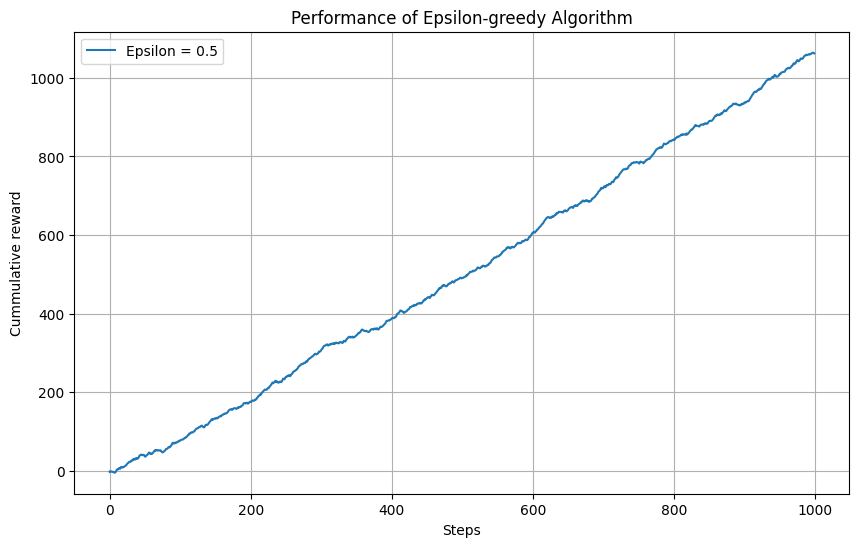

In [37]:
epsilons = [0.01, 0.05, 0.1, 0.3, 0.5]
results, true_values = multi_epsilon_multi_armed_bandit(num_steps=1000, k=10, epsilons=epsilons)

plt.figure(figsize=(10,6))
for epsilon, rewards in results.items():
    plt.plot(rewards, label=f"Epsilon = {epsilon}")
plt.xlabel("Steps")
plt.ylabel("Cummulative reward")
plt.title("Performance of Epsilon-greedy Algorithm")
plt.legend()
plt.grid()
plt.show()



In [38]:
import numpy as np

def epsilon_greedy(num_steps=10000, k=10,c=0.3):

    Q = np.zeros(k)
    N = np.zeros(k)
    ture_value = np.random.normal(0,1,k)

    rewards = []

    for t in range(1, num_steps + 1):
        if t <= k:
            action = t - 1
        else:
            ucb_values = Q + c * np.sqrt(np.log(t)/(N + 1e-5))
            action = np.argmax(ucb_values)

        reward = np.random.normal(ture_value[action],1)  

        N[action] += 1

        Q[action] += (reward - Q[action])/N[action]

        rewards.append(reward)


    return Q, N, true_values, np.cumsum(rewards)

Estimated Values (Q): [-2.46387487  1.24049994  0.87555652  1.02409568 -1.44443105  0.77775912
  0.54942524  1.59316223  1.90316065 -1.18179795]
Action Selection Counts (N): [  1.  13.   6.  11.   1.   5.   5.  53. 904.   1.]
True Values of Arms: [-1.57161137  1.57191284  0.64693631  1.23649573 -1.4354755   1.18792189
  0.81652955  1.64926591  1.89919917 -1.18682501]


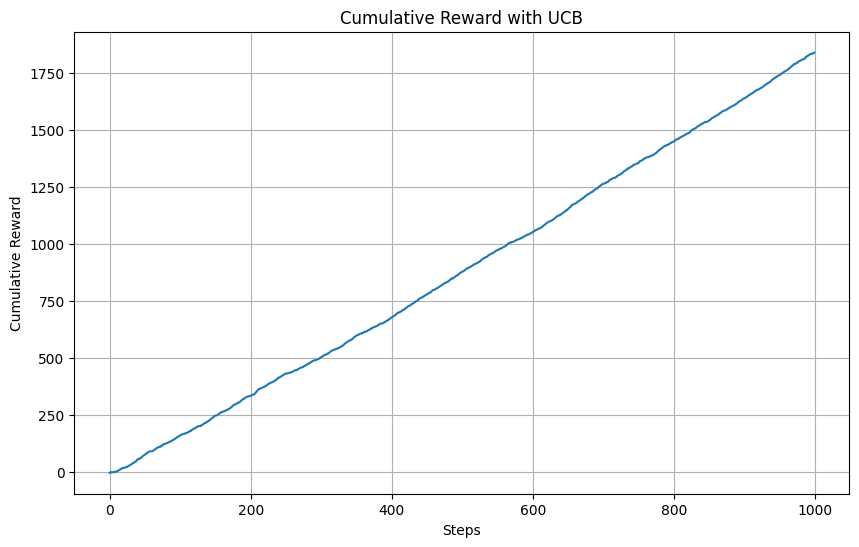

In [39]:
# Run UCB
Q, N, true_value, cumulative_rewards = UCB(num_steps=1000, k=10, c=1.0)

# Print results
print("Estimated Values (Q):", Q)
print("Action Selection Counts (N):", N)
print("True Values of Arms:", true_value)

# Plot cumulative rewards over time
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(cumulative_rewards)
plt.xlabel("Steps")
plt.ylabel("Cumulative Reward")
plt.title("Cumulative Reward with UCB")
plt.grid()
plt.show()


In [46]:
# Modify epsilon-greedy
def epsilon_greedy(num_steps, k, epsilon):
    Q = np.zeros(k)
    N = np.zeros(k)
    true_value = np.random.normal(0, 1, k)

    rewards = []
    optimal_action_count = []
    optimal_action = np.argmax(true_value)

    for _ in range(num_steps):
        if np.random.rand() < epsilon:
            action = np.random.choice(k)
        else:
            action = np.argmax(Q)

        reward = np.random.normal(true_value[action], 1)

        # Track rewards and optimal action
        rewards.append(reward)
        optimal_action_count.append(1 if action == optimal_action else 0)

        N[action] += 1
        Q[action] += (reward - Q[action]) / N[action]

    cumulative_rewards = np.cumsum(rewards)
    optimal_action_rate = np.cumsum(optimal_action_count) / np.arange(1, num_steps + 1)

    return cumulative_rewards, optimal_action_rate

# Modify UCB similarly
def Ucb(num_steps, c, k):
    Q = np.zeros(k)
    N = np.zeros(k)
    true_values = np.random.normal(0, 1, k)
    
    optimal_action_count_ucb = []
    optimal_action = np.argmax(true_values)
    

    t = 0

    for _ in range(num_steps):

        if t < k:
            action = t
        else:
            confidence_bound = Q + c * np.sqrt(np.log(t)/N + 1e-5)
            action = np.argmax(confidence_bound)

        reward = np.random.normal(true_values[action], 1)
        optimal_action_count_ucb.append(1 if action == optimal_action else 0)

        N[action] += 1
        Q[action] += (reward - Q[action])/N[action]
        t += 1

    commulative_rewards_ucb = np.cumsum(reward)
    optimal_action_rate_ucb = np.cumsum(optimal_action_count_ucb) / np.arange(1, num_steps + 1)  

    return commulative_rewards_ucb, optimal_action_rate_ucb

# Parameters
num_steps = 10000
k = 10
epsilon = 0.1
c = 1.0

# Run epsilon-greedy
cumulative_rewards_eg, optimal_action_rate_eg = epsilon_greedy(num_steps, k, epsilon)

# Run UCB
cumulative_rewards_ucb, optimal_action_rate_ucb = Ucb(num_steps, c, k)


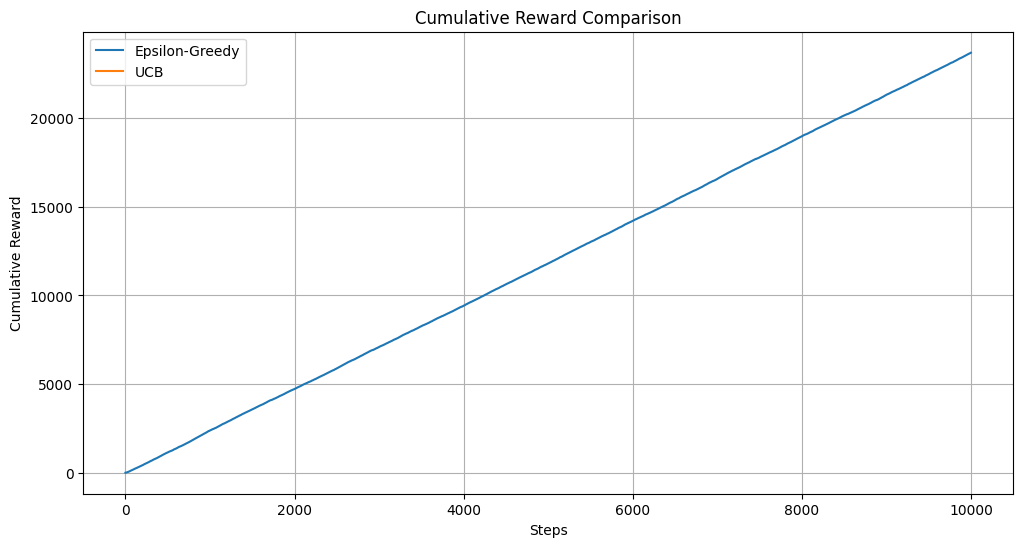

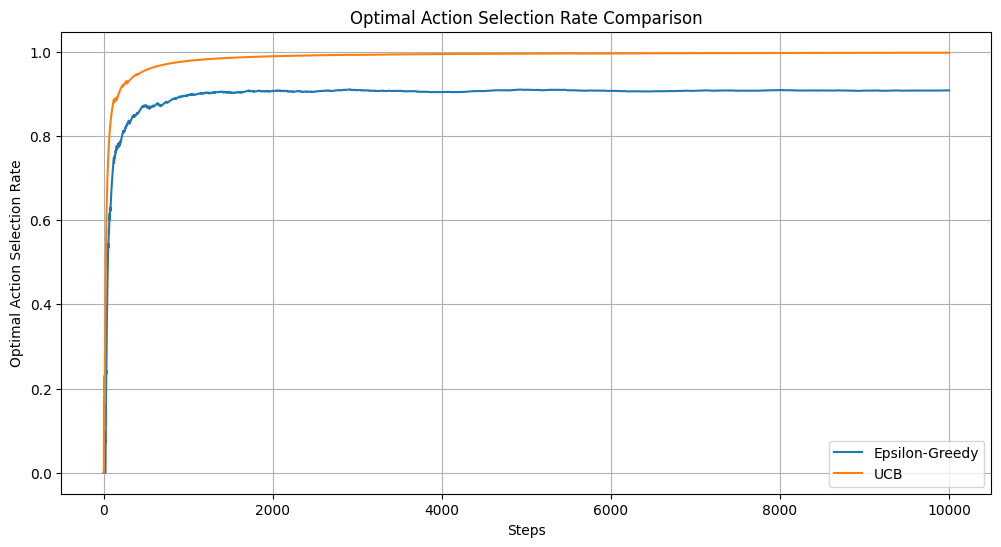

In [47]:
# Plot cumulative rewards
plt.figure(figsize=(12, 6))
plt.plot(cumulative_rewards_eg, label="Epsilon-Greedy")
plt.plot(cumulative_rewards_ucb, label="UCB")
plt.xlabel("Steps")
plt.ylabel("Cumulative Reward")
plt.title("Cumulative Reward Comparison")
plt.legend()
plt.grid()
plt.show()

# Plot optimal action selection rates
plt.figure(figsize=(12, 6))
plt.plot(optimal_action_rate_eg, label="Epsilon-Greedy")
plt.plot(optimal_action_rate_ucb, label="UCB")
plt.xlabel("Steps")
plt.ylabel("Optimal Action Selection Rate")
plt.title("Optimal Action Selection Rate Comparison")
plt.legend()
plt.grid()
plt.show()